Caroline Gerbaudo Nakazato RA 168913

In [42]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



In [44]:
Categories=['AVC','EM']
print("Type y to give categories or type n to go with classification of AVC and EM");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type y to give categories or type n to go with classification of AVC and EM
n


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
flat_data_arr=[]
target_arr=[]
datadir='/content/drive/MyDrive/Train'
for i in Categories:
  print(f'loading... categoria : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded categoria:{i} sucesso')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... categoria : AVC
loaded categoria:AVC sucesso
loading... categoria : EM
loaded categoria:EM sucesso


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Dividindo os dados em dados de treinamento e teste

In [50]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('dividido com sucesso')

dividido com sucesso


In [48]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print('O treinamento do modelo foi iniciado, aguarde um pouco, pois pode levar alguns minutos para ser concluído')
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('O modelo é bem treinado com as imagens fornecidas')
model.best_params_

O treinamento do modelo foi iniciado, aguarde um pouco, pois pode levar alguns minutos para ser concluído
O modelo é bem treinado com as imagens fornecidas


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [51]:
pd.DataFrame(model.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",7,0.892692
1,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}",24,0.815079
2,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",6,0.897040
3,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",11,0.858094
4,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",25,0.517299
5,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",11,0.858094
6,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",25,0.517299
7,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",11,0.858094
8,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",2,0.905735
9,"{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}",10,0.866605


Predicting our testing data

In [52]:
y_pred=model.predict(x_test)
print("Os dados previstos são:")
y_pred

Os dados previstos são:


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [53]:
print("Os dados reais são:")
np.array(y_test)

Os dados reais são:


array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [54]:
print(classification_report(y_pred,y_test))
print("Matriz de Confusao")
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.93      1.00      0.97        28

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Matriz de Confusao


array([[29,  2],
       [ 0, 28]])

In [55]:
print(f"O modelo tem {accuracy_score(y_pred,y_test)*100}% de acuracia")

O modelo tem 96.61016949152543% de acuracia


Usando o Pickle para salvar o modelo em disco

In [56]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle ok")

Pickle ok


O modelo baseado em aprendizado de máquina é criado com sucesso.
Teste do modelo:

URL da Imagem: /content/drive/MyDrive/SLE/678_FLAIR22.png


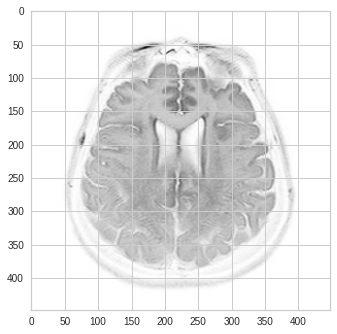

AVC = 21.498542836756318%
EM = 78.50145716324369%
The predicted image is : EM
Is the image a EM ?(y/n)


KeyboardInterrupt: ignored

In [147]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('URL da Imagem: ')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("por favor entre com y or n")

if(b=='n'):
  print("O que eh esta imagem?")
  for i in range(len(Categories)):
    print(f"Enter {i} para {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Por favor entre um numero valido entre 0-{len(Categories)-1}")
    k=int(input())
  print("Por favor, espere um pouco para que o modelo aprenda com esta imagem :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"O modelo agora tem {accuracy_score(y_pred1,y_test1)*100}% acuracia")
  pickle.dump(model1,open('img_model.p','wb'))
print("Obrigada pelo feedback")


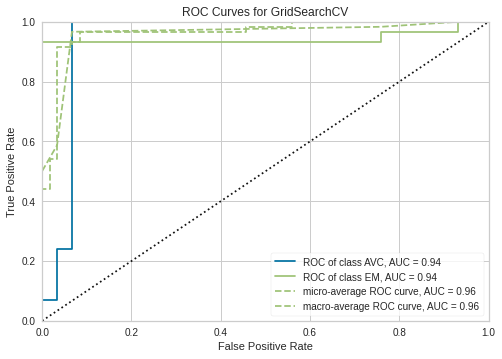

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3332c13ad0>,
       encoder={0: 'AVC', 1: 'EM'},
       estimator=GridSearchCV(estimator=SVC(probability=True),
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'gamma': [0.0001, 0.001, 0.1, 1],
                                          'kernel': ['rbf', 'poly']}))

In [57]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'AVC', 
                                        1: 'EM'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

plot_ROC_curve(model, x_train, y_train, x_test, y_test)